## Preparation& Clean Data

#### 1. Import relevant libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import numpy as np

#### 2. Overview the dataset

In [ ]:
df_2020 = pd.read_csv('/content/drive/MyDrive/Final Project/kaggle_survey_2020_responses.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Final Project/kaggle_survey_2021_responses.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 3. Remove unwanted data

##### Get common columns of 3 data frames

In [ ]:
def get_column_name(x):
  for i in x[:1].values:
    return i

In [ ]:
columns_2020 = get_column_name(df_2020)

In [ ]:
columns_2021 = get_column_name(df_2021)

In [ ]:
df_2020.columns = columns_2020
df_2021.columns = columns_2021

In [ ]:
df_2021.columns = df_2021.columns.str.replace(r"Where do you publicly share your data analysis or machine learning applications", "Where do you publicly share or deploy your data analysis or machine learning applications", regex=True)
df_2021.columns = df_2021.columns.str.replace(r"In the next 2 years, do you hope to become more familiar with any of these managed machine learning products", "In the next 2 years, do you hope to become more familiar with any of these specific machine learning products", regex=True)
df_2021.columns = df_2021.columns.str.replace(r"Amazon Elastic Compute Cloud \(EC2\) ", "Amazon EC2 ", regex=True)

In [ ]:
df_2020.columns = df_2020.columns.str.replace(r"Visual Studio / Visual Studio Code", "Visual Studio", regex=True)

In [ ]:
df_2020.columns = df_2020.columns.str.replace(r"Click to write Choice 13", " Visual Studio Code (VSCode) ", regex=True)

In [ ]:
columns_2021 = df_2021.columns

In [ ]:
columns_2020 = df_2020.columns

In [ ]:
list_same_name = list(np.intersect1d(columns_2020,columns_2021))

In [ ]:
len(list_same_name)

288

In [ ]:
list_same_name

##### Reshaping dataframes

In [ ]:
data_2020 = df_2020[[c for c in df_2020.columns if c in list_same_name]]
data_2021 = df_2021[[c for c in df_2021.columns if c in list_same_name]]

In [ ]:
data_2020 = data_2020[1:]
data_2021 = data_2021[1:]

In [ ]:
data_2020['Year'] = 2020
data_2021['Year'] = 2021

In [ ]:
df = pd.concat([data_2020,data_2021]).reset_index()

In [ ]:
df.drop(columns=['index'],inplace= True)

In [ ]:
df = df.rename(columns={'What is your age (# years)?':'Age','In which country do you currently reside?':'Country','Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'Job','What is your gender? - Selected Choice':'Gender','What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'Degree','For how many years have you been writing code and/or programming?':'Experience','What is your current yearly compensation (approximate $USD)?':'Compensation','For how many years have you used machine learning methods?':'ML Experience'})

In [ ]:
df.columns

##### Combine columns of the same type

In [ ]:
df['Job'] = df['Job'].replace({'Business Analyst':'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'})
df['Job'] = df['Job'].replace({'Data Analyst':'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'})
df['Job'] = df['Job'].replace({'Data Architect':'Data Scientist'})
df['Job'] = df['Job'].replace({'Data Administrator':'DBA/Database Engineer'})
df['Job'] = df['Job'].replace({'Program/Project Manager':'Manager (Program, Project, Operations, Executive-level, etc)'})
df['Job'] = df['Job'].replace({'Product Manager':'Manager (Program, Project, Operations, Executive-level, etc)'})
df['Job'] = df['Job'].replace({'Product/Project Manager':'Manager (Program, Project, Operations, Executive-level, etc)'})
df['Job'] = df['Job'].replace({'Machine Learning/ MLops Engineer':'Machine Learning Engineer'})

In [ ]:
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$1000-$9,999':5000})
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$0 ($USD)':0})
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$1-$99':50})
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$100-$999':500})
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$10,000-$99,999':50000})
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace({'$100,000 or more ($USD)':100000})

In [ ]:
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace({'Never':0})
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace({'6-25 times':15})
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace({'Once':1})
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace({'2-5 times':3.5})
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace({'More than 25 times':25})


In [ ]:
df['Job'] = df['Job'].replace({'Data Analyst (Business, Marketing, Financial, Quantitative, etc)':'DA'})
df['Job'] = df['Job'].replace({'Data Scientist':'DS'})

In [ ]:
df['Anual compensation'] = df['Compensation']

In [ ]:
df['Compensation'] = df['Compensation'].replace({'100,000-124,999':112000})
df['Compensation'] = df['Compensation'].replace({'15,000-19,999':17500})
df['Compensation'] = df['Compensation'].replace({'125,000-149,999':137000})
df['Compensation'] = df['Compensation'].replace({'70,000-79,999':75000})
df['Compensation'] = df['Compensation'].replace({'30,000-39,999':35000})
df['Compensation'] = df['Compensation'].replace({'90,000-99,999':95000})
df['Compensation'] = df['Compensation'].replace({'1,000-1,999':1500})
df['Compensation'] = df['Compensation'].replace({'$0-999':500})
df['Compensation'] = df['Compensation'].replace({'10,000-14,999':12500})
df['Compensation'] = df['Compensation'].replace({'150,000-199,999':175000})
df['Compensation'] = df['Compensation'].replace({'60,000-69,999':65000})
df['Compensation'] = df['Compensation'].replace({'4,000-4,999':4500})
df['Compensation'] = df['Compensation'].replace({'> $500,000':500000})
df['Compensation'] = df['Compensation'].replace({'300,000-500,000':400000})
df['Compensation'] = df['Compensation'].replace({'40,000-49,999':45000})
df['Compensation'] = df['Compensation'].replace({'25,000-29,999':27500})
df['Compensation'] = df['Compensation'].replace({'80,000-89,999':85000})
df['Compensation'] = df['Compensation'].replace({'7,500-9,999':8750})
df['Compensation'] = df['Compensation'].replace({'50,000-59,999':55000})
df['Compensation'] = df['Compensation'].replace({'250,000-299,999':275000})
df['Compensation'] = df['Compensation'].replace({'5,000-7,499':6250})
df['Compensation'] = df['Compensation'].replace({'2,000-2,999':2500})
df['Compensation'] = df['Compensation'].replace({'20,000-24,999':22500})
df['Compensation'] = df['Compensation'].replace({'200,000-249,999':225000})
df['Compensation'] = df['Compensation'].replace({'3,000-3,999':3500})
df['Compensation'] = df['Compensation'].replace({'300,000-499,999':400000})
df['Compensation'] = df['Compensation'].replace({'>$1,000,000':1000000})
df['Compensation'] = df['Compensation'].replace({'$500,000-999,999':750000})

In [ ]:
df['Anual compensation'] = df['Anual compensation'].replace({'$0-999':'a. < 1000'})
df['Anual compensation'] = df['Anual compensation'].replace({'1,000-1,999':'b.1000-9999','2,000-2,999':'b.1000-9999','3,000-3,999':'b.1000-9999','4,000-4,999':'b.1000-9999','5,000-7,499':'b.1000-9999','7,500-9,999':'b.1000-9999'})
df['Anual compensation'] = df['Anual compensation'].replace({'10,000-14,999':'c.10000-49999','15,000-19,999':'c.10000-49999','20,000-24,999':'c.10000-49999','25,000-29,999':'c.10000-49999','30,000-39,999':'c.10000-49999','40,000-49,999':'c.10000-49999'})
df['Anual compensation'] = df['Anual compensation'].replace({'50,000-59,999':'d.50000-99999','60,000-69,999':'d.50000-99999','70,000-79,999':'d.50000-99999','80,000-89,999':'d.50000-99999','90,000-99,999':'d.50000-99999'})
df['Anual compensation'] = df['Anual compensation'].replace({'100,000-124,999':'e. > 100000','125,000-149,999':'e. > 100000','150,000-199,999':'e. > 100000','200,000-249,999':'e. > 100000','250,000-299,999':'e. > 100000','300,000-499,999':'e. > 100000','300,000-500,000':'e. > 100000','> $500,000':'e. > 100000','$500,000-999,999':'e. > 100000','>$1,000,000':'e. > 100000'})

In [ ]:
df['Anual compensation'].unique()

array([nan, 'e. > 100000', 'c.10000-49999', 'd.50000-99999',
       'b.1000-9999', 'a. < 1000'], dtype=object)

In [ ]:
df['ML Experience'] = df['ML Experience'].replace({'I do not use machine learning methods':'a.Not use'})
df['ML Experience'] = df['ML Experience'].replace({'Under 1 year':'b.< 1 years'})
df['ML Experience'] = df['ML Experience'].replace({'1-2 years':'c.1-2 years'})
df['ML Experience'] = df['ML Experience'].replace({'2-3 years':'d.2-3 years'})
df['ML Experience'] = df['ML Experience'].replace({'3-4 years':'e.3-4 years'})
df['ML Experience'] = df['ML Experience'].replace({'4-5 years':'f.4-5 years'})
df['ML Experience'] = df['ML Experience'].replace({'5-10 years':'g.5-10 years'})
df['ML Experience'] = df['ML Experience'].replace({'10-20 years':'h.10-20 years'})
df['ML Experience'] = df['ML Experience'].replace({'20 or more years':'i.> 20 years'})

In [ ]:
df['Experience'] = df['Experience'].replace({'I have never written code':'a.Not use'})
df['Experience'] = df['Experience'].replace({'< 1 years':'b.< 1 years'})
df['Experience'] = df['Experience'].replace({'1-2 years':'c.1-3 years'})
df['Experience'] = df['Experience'].replace({'1-3 years':'c.1-3 years'})
df['Experience'] = df['Experience'].replace({'3-5 years':'d.3-5 years'})
df['Experience'] = df['Experience'].replace({'5-10 years':'e.5-10 years'})
df['Experience'] = df['Experience'].replace({'10-20 years':'f.10-20 years'})
df['Experience'] = df['Experience'].replace({'20+ years':'g.> 20 years'})

In [ ]:
df['Experience'].unique()

array(['e.5-10 years', 'f.10-20 years', 'd.3-5 years', 'b.< 1 years',
       'c.1-3 years', 'g.> 20 years', 'a.Not use', nan], dtype=object)

In [ ]:
df['Age range'] = df['Age']

In [ ]:
df['Age'] = df['Age'].replace({'18-21':19.5})
df['Age'] = df['Age'].replace({'22-24':23.0})
df['Age'] = df['Age'].replace({'25-29':27.0})
df['Age'] = df['Age'].replace({'30-34':32.0})
df['Age'] = df['Age'].replace({'35-39':37.0})
df['Age'] = df['Age'].replace({'40-44':42.0})
df['Age'] = df['Age'].replace({'45-49':47.0})
df['Age'] = df['Age'].replace({'50-54':52.0})
df['Age'] = df['Age'].replace({'55-59':57.0})
df['Age'] = df['Age'].replace({'60-69':64.5})
df['Age'] = df['Age'].replace({'70+':70})

In [ ]:
df['Country'] = df['Country'].replace({'United States of America':'US'})
df['Country'] = df['Country'].replace({'United Kingdom of Great Britain and Northern Ireland':'UK'})

In [ ]:
df.columns = df.columns.str.replace(r"What programming languages do you use on a regular basis\? \(Select all that apply\) - Selected Choice", "Programming languages", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Which of the following integrated development environments \(IDE\'s\) do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "IDE's", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Which of the following machine learning frameworks do you use on a regular basis\? \(Select all that apply\) - Selected Choice", "ML frameworks", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Which of the following ML algorithms do you use on a regular basis\? \(Select all that apply\): - Selected Choice", "ML algorithms", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Which categories of computer vision methods do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "Computer vision methods", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Which of the following natural language processing \(NLP\) methods do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "NLP methods", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"On which platforms have you begun or completed data science courses\? \(Select all that apply\) - Selected Choice", "DS learning platforms", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Who/what are your favorite media sources that report on data science topics\? \(Select all that apply\) - Selected Choice", "Media sources", regex=True)

In [ ]:
df.columns = df.columns.str.replace(r"Who/what are your favorite media sources that report on data science topics\? \(Select all that apply\) - Selected Choice", "Media sources", regex=True)

In [ ]:
df

#### 4. Deal with missing values

## Exploratory Data Analysis (EDA)

DA,DS là 2 job phổ biến nhất trên Kaggle

In [ ]:
final_df = df[df['Job'].isin(['DA','DS'])]
final_df = final_df[final_df['Country'].isin(['China','India'])]
final_df = final_df[final_df['Age'] < 30]
final_df = final_df[final_df['Anual compensation'].notna()]

In [ ]:
final_df

In [ ]:
final_df['Compensation'].value_counts()

In [ ]:
final_df = final_df[~final_df['Compensation'].isin([1000000,500000,750000])]

In [ ]:
final_df.columns

In [ ]:
Anual_tb = round(final_df.groupby('Anual compensation')['Age'].count()/final_df[final_df['Anual compensation'].notna()]['Age'].count(),3)
Anual_tb = Anual_tb.to_frame('Count')

In [ ]:
Anual_tb.reset_index()

,Anual compensation,Count
0,a. < 1000,0.394
1,b.1000-9999,0.342
2,c.10000-49999,0.228
3,d.50000-99999,0.024
4,e. > 100000,0.012


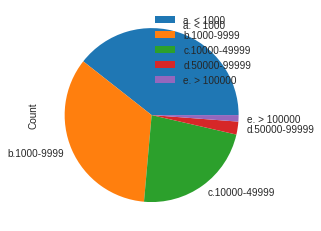

In [ ]:
Anual_tb.plot.pie(y='Count')

Compensation of  these roles fluctuates in a wide range: from < 10000 to > 100000.

However, the majority of respondents have compensation < 10000$

#### BQ: How to achieve compensation > 10000$ 

In [ ]:
# Classification of Compensation in 2 groups: High, Low
final_df['Compensation level'] = 'High'
final_df.loc[final_df['Anual compensation'].isin(['a. < 1000','b.1000-9999']),'Compensation level'] = 'Low'


In [ ]:
# Classification of Company into 3 groups: 
final_df['Company size'] = 'Small'
final_df.loc[final_df['What is the size of the company where you are employed?'].isin(['50-249 employees','250-999 employees']),'Company size'] = 'Medium'
final_df.loc[final_df['What is the size of the company where you are employed?'].isin(['1000-9,999 employees','10,000 or more employees']),'Company size'] = 'Big'

###### To get High compensation, DA & DS should enter medium and big companies

In [ ]:
Compen_Company = round(final_df.groupby(['Compensation level','Company size'])['Age'].count()/final_df.groupby('Compensation level')['Age'].count(),2)
Compen_Company = Compen_Company.to_frame('Ratio')


In [ ]:
Compen_Company = Compen_Company.reset_index()


In [ ]:
Compen_Company

,Compensation level,Company size,Ratio
0,High,Big,0.56
1,High,Medium,0.28
2,High,Small,0.16
3,Low,Big,0.28
4,Low,Medium,0.24
5,Low,Small,0.48


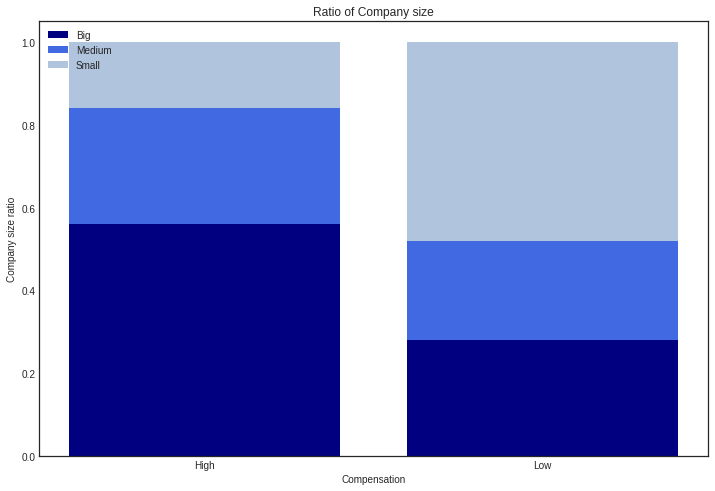

In [ ]:
# Tỉ lệ Company size theo Compensation level
x = ['High', 'Low']
y1 = np.array([0.56,0.28])
y2 = np.array([0.28,0.24])
y3 = np.array([0.16,0.48])


plt.figure(figsize=(12,8))
plt.bar(x, y1, color='navy')
plt.bar(x, y2, bottom=y1, color='royalblue')
plt.bar(x, y3, bottom=y1+y2, color='lightsteelblue')


plt.xlabel("Compensation")
plt.ylabel("Company size ratio")
plt.legend(["Big", "Medium", "Small"],loc='upper left')
plt.title("Ratio of Company size")
plt.show()

In [ ]:
Compen_Ave = round(final_df.groupby('Company size')['Compensation'].mean(),2)
Compen_Ave = Compen_Ave.reset_index()
Compen_Ave = Compen_Ave.sort_values('Compensation')

In [ ]:
Compen_Ave

,Company size,Compensation
2,Small,5456.98
1,Medium,10832.96
0,Big,15661.93


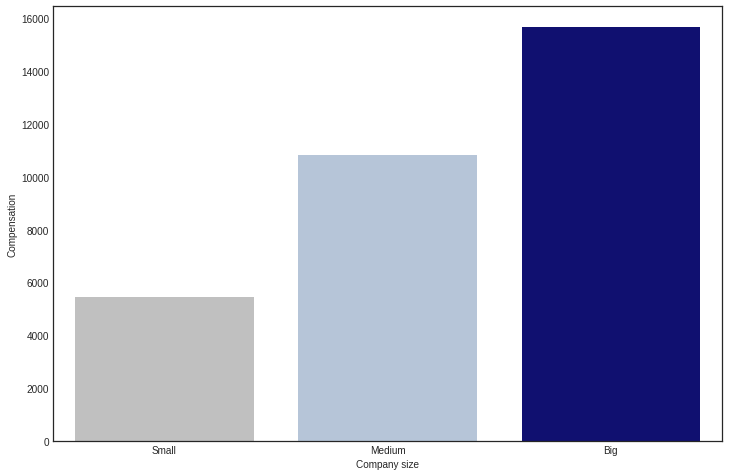

In [ ]:
# Average compensation increases with company size
plt.figure(figsize=(12,8))
sns.barplot(data =Compen_Ave,
             x='Company size',
             y='Compensation',
            palette = ['silver','lightsteelblue','Navy']
             )
plt.ylabel('Compensation')
plt.show()

###### Coding experience is an advantage

In [ ]:
# Degree by company size
Degree_tb = round(final_df.groupby(['Company size','Degree'])['Age'].count()/final_df[final_df['Company size'].notna()].groupby('Company size')['Age'].count(),2)
Degree_tb = Degree_tb.to_frame('Ratio')


In [ ]:
Degree_tb.reset_index()

,Company size,Degree,Ratio
0,Big,Bachelor’s degree,0.51
1,Big,Doctoral degree,0.01
2,Big,I prefer not to answer,0.01
3,Big,Master’s degree,0.44
4,Big,No formal education past high school,0.00
5,Big,Professional degree,0.02
6,Big,Professional doctorate,0.00
7,Big,Some college/university study without earning ...,0.01
8,Medium,Bachelor’s degree,0.46
9,Medium,Doctoral degree,0.01


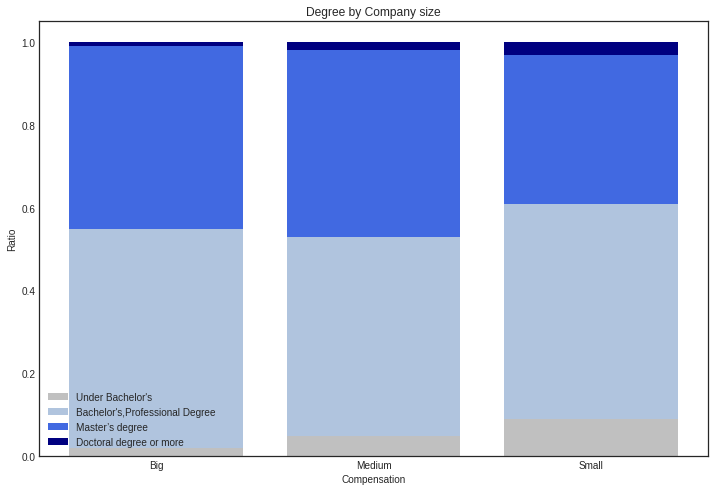

In [ ]:
x = ['Big', 'Medium','Small']
y1 = np.array([0.02,0.05,0.09])
y2 = np.array([0.53,0.48,0.52])
y3 = np.array([0.44,0.45,0.36])
y4 = np.array([0.01,0.02,0.03])

plt.figure(figsize=(12,8))
plt.bar(x, y1, color='silver')
plt.bar(x, y2, bottom=y1, color='lightsteelblue')
plt.bar(x, y3, bottom=y1+y2, color='royalblue')
plt.bar(x, y4, bottom=y1+y2+y3, color='navy')

plt.xlabel("Compensation")
plt.ylabel("Ratio")
plt.legend(["Under Bachelor's", "Bachelor's,Professional Degree", "Master’s degree", "Doctoral degree or more"],loc='lower left')
plt.title("Degree by Company size")
plt.show()

Degree has no significant difference

In [ ]:
# Coding exp by company size
Ex_tb = round(final_df.groupby(['Company size','Experience'])['Age'].count()/final_df[final_df['Experience'].notna()].groupby('Company size')['Age'].count(),2)
Ex_tb = Ex_tb.to_frame('Ratio')
Ex_tb = Ex_tb.reset_index()
Ex_tb

,Company size,Experience,Ratio
0,Big,a.Not use,0.05
1,Big,b.< 1 years,0.17
2,Big,c.1-3 years,0.34
3,Big,d.3-5 years,0.32
4,Big,e.5-10 years,0.10
5,Big,f.10-20 years,0.02
6,Medium,a.Not use,0.06
7,Medium,b.< 1 years,0.28
8,Medium,c.1-3 years,0.42
9,Medium,d.3-5 years,0.17


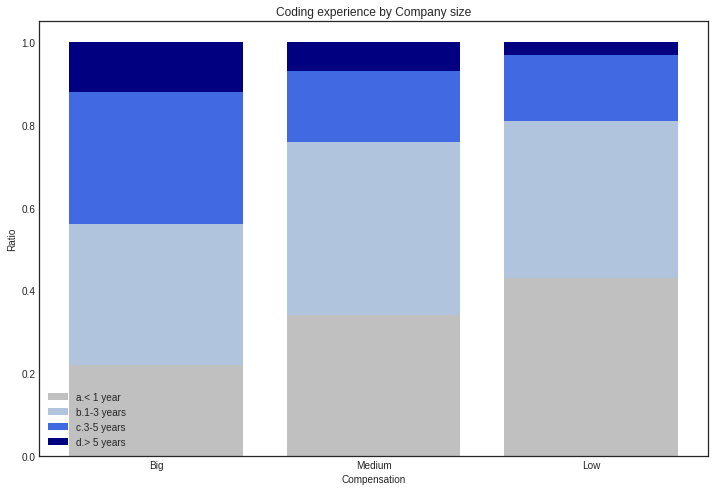

In [ ]:
x = ['Big','Medium','Low']
y1 = np.array([0.22,0.34,0.43])
y2 = np.array([0.34,0.42,0.38])
y3 = np.array([0.32,0.17,0.16])
y4 = np.array([0.12,0.07,0.03])

plt.figure(figsize=(12,8))
plt.bar(x, y1, color='silver')
plt.bar(x, y2, bottom=y1, color='lightsteelblue')
plt.bar(x, y3, bottom=y1+y2, color='royalblue')
plt.bar(x, y4, bottom=y1+y2+y3, color='navy')

plt.xlabel("Compensation")
plt.ylabel("Ratio")
plt.legend(["a.< 1 year", "b.1-3 years", "c.3-5 years", "d.> 5 years"],loc='lower left')
plt.title("Coding experience by Company size")
plt.show()

In [ ]:
final_df

,Duration (in seconds),Age,Gender,Country,Degree,Job,Experience,Programming languages - Python,Programming languages - R,Programming languages - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other",Year,Anual compensation,Age range,Compensation level,Company size
65,1191,27.0,Man,China,Some college/university study without earning ...,DS,b.< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,a. < 1000,25-29,Low,Small
77,1666,19.5,Man,India,Bachelor’s degree,DS,b.< 1 years,Python,R,SQL,...,NaN,NaN,NaN,None,NaN,2020,a. < 1000,18-21,Low,Small
93,989,23.0,Man,India,Bachelor’s degree,DA,d.3-5 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,2020,c.10000-49999,22-24,High,Big
138,638,27.0,Woman,India,Bachelor’s degree,DA,c.1-3 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,2020,b.1000-9999,25-29,Low,Big
221,693,23.0,Woman,India,Master’s degree,DS,b.< 1 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,2020,a. < 1000,22-24,Low,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,20099,27.0,Man,India,Bachelor’s degree,DS,d.3-5 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,2021,c.10000-49999,25-29,High,Big
45990,474,27.0,Man,India,Professional doctorate,DA,b.< 1 years,Python,NaN,NaN,...,NaN,Polyaxon,NaN,NaN,NaN,2021,a. < 1000,25-29,Low,Medium
45994,617,23.0,Man,India,Master’s degree,DS,c.1-3 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,2021,a. < 1000,22-24,Low,Small
45995,96354,19.5,Man,India,Bachelor’s degree,DA,c.1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,2021,a. < 1000,18-21,Low,Small


Coding experience is an advantage

In [ ]:
Count_act = final_df[final_df.columns[105:111]].count(axis='columns')
Count_act = Count_act.to_frame('Count act')
Count_act.reset_index()

,index,Count act
0,65,0
1,77,1
2,93,1
3,138,0
4,221,0
...,...,...
1783,45957,3
1784,45990,2
1785,45994,3
1786,45995,1


In [ ]:
Count_act

In [ ]:
Ex_act = pd.concat([final_df[final_df.columns[:7]],Count_act[Count_act.columns[-1:]]],axis =1)
Ex_act

,Duration (in seconds),Age,Gender,Country,Degree,Job,Experience,Count act
65,1191,27.0,Man,China,Some college/university study without earning ...,DS,b.< 1 years,0
77,1666,19.5,Man,India,Bachelor’s degree,DS,b.< 1 years,1
93,989,23.0,Man,India,Bachelor’s degree,DA,d.3-5 years,1
138,638,27.0,Woman,India,Bachelor’s degree,DA,c.1-3 years,0
221,693,23.0,Woman,India,Master’s degree,DS,b.< 1 years,0
...,...,...,...,...,...,...,...,...
45957,20099,27.0,Man,India,Bachelor’s degree,DS,d.3-5 years,3
45990,474,27.0,Man,India,Professional doctorate,DA,b.< 1 years,2
45994,617,23.0,Man,India,Master’s degree,DS,c.1-3 years,3
45995,96354,19.5,Man,India,Bachelor’s degree,DA,c.1-3 years,1


In [ ]:
Ex_act = Ex_act.groupby('Experience')['Count act'].mean().reset_index()

In [ ]:
Ex_act

,Experience,Count act
0,a.Not use,1.315789
1,b.< 1 years,1.862786
2,c.1-3 years,2.275556
3,d.3-5 years,2.714286
4,e.5-10 years,3.277778
5,f.10-20 years,2.750000
6,g.> 20 years,2.500000


In [ ]:
color = ['silver','lightsteelblue','royalblue','navy']

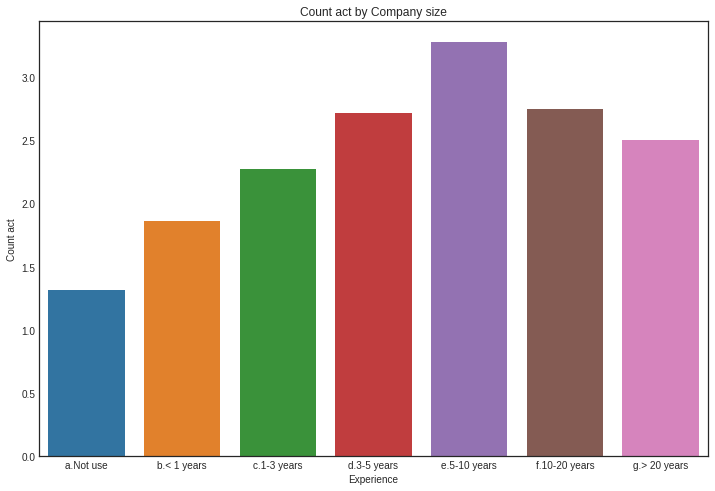

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Ex_act,
            x="Experience",
            y="Count act")
plt.title('Count act by Company size')
plt.show()

###### Coding experience gives advantage in handling activities

In [ ]:
Activity_tb = pd.concat([final_df[final_df.columns[-2:]],Count_act[Count_act.columns[-1:]]],axis =1)
Activity_tb

,Compensation level,Company size,Count act
65,Low,Small,0
77,Low,Small,1
93,High,Big,1
138,Low,Big,0
221,Low,Small,0
...,...,...,...
45957,High,Big,3
45990,Low,Medium,2
45994,Low,Small,3
45995,Low,Small,1


In [ ]:
Activity_tb.groupby(['Company size','Compensation level'])['Count act'].mean()

Company size  Compensation level
Big           High                  2.923954
              Low                   2.202703
Medium        High                  2.686567
              Low                   2.115385
Small         High                  2.546667
              Low                   1.977918
Name: Count act, dtype: float64

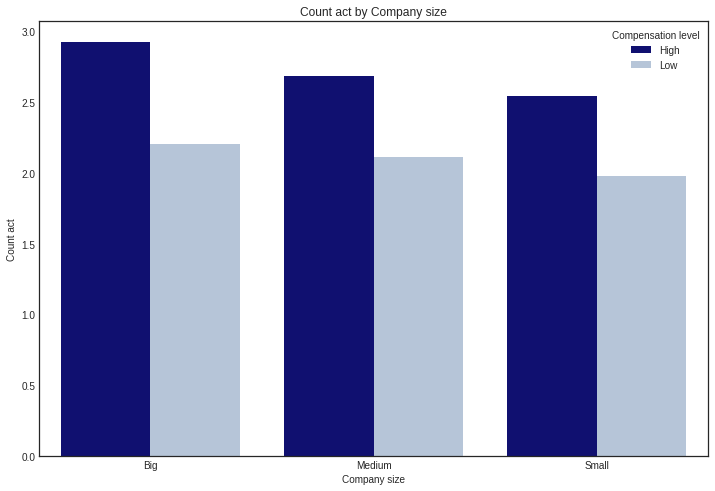

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Activity_tb.groupby(['Company size','Compensation level'])['Count act'].mean().reset_index(),
            x="Company size",
            y="Count act",
            hue = 'Compensation level',
            palette = ['Navy','lightsteelblue'])
plt.title('Count act by Company size')
plt.show()

In [ ]:
Activity_all = pd.concat([final_df[final_df.columns[-2:]],final_df[final_df.columns[105:111]]],axis =1)
Activity_all

,Compensation level,Company size,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning
65,Low,Small,NaN,NaN,NaN,NaN,NaN,NaN
77,Low,Small,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN
93,High,Big,NaN,NaN,Build prototypes to explore applying machine l...,NaN,NaN,NaN
138,Low,Big,NaN,NaN,NaN,NaN,NaN,NaN
221,Low,Small,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
45957,High,Big,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,NaN,Experimentation and iteration to improve exist...,NaN
45990,Low,Medium,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,Do research that advances the state of the art...
45994,Low,Small,Analyze and understand data to influence produ...,NaN,NaN,Build and/or run a machine learning service th...,NaN,Do research that advances the state of the art...
45995,Low,Small,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN


In [ ]:
Activity_ratio = Activity_all.groupby(['Company size','Compensation level'])[Activity_all.columns[2:]].count()
Activity_ratio['Total'] = Activity_all.groupby(['Company size','Compensation level'])['Compensation level'].count()

In [ ]:
Activity_ratio.reset_index()

,Company size,Compensation level,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions,"Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models,Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning,Total
0,Big,High,208,111,133,121,126,70,263
1,Big,Low,274,133,112,100,105,91,370
2,Medium,High,102,55,64,51,56,32,134
3,Medium,Low,227,114,87,74,89,69,312
4,Small,High,53,30,32,27,28,21,75
5,Small,Low,420,199,178,160,153,144,634


In [ ]:
Activity_ratio[0:1] = round(Activity_ratio[0:1]/263,2)
Activity_ratio[1:2] = round(Activity_ratio[1:2]/370,2)
Activity_ratio[2:3] = round(Activity_ratio[2:3]/134,2)
Activity_ratio[3:4] = round(Activity_ratio[3:4]/312,2)
Activity_ratio[4:5] = round(Activity_ratio[4:5]/75,2)
Activity_ratio[5:6] = round(Activity_ratio[5:6]/634,2)

In [ ]:
Activity_ratio

Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions  \
Company size Compensation level                                                                                                                                                                                                  
Big          High                                                             0.79                                                                                                                                               
             Low                                                              0.74                                                                                                                                               
Medium       High                                                             0.76                                                                                                                                               
             Low                                                              0.73                                                                                                                                               
Small        High                                                             0.71                                                                                                                                               
             Low                                                              0.66                                                                                                                                               

                                 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data  \
Company size Compensation level                                                                                                                                                                                                                                            
Big          High                                                             0.42                                                                                                                                                                                         
             Low                                                              0.36                                                                                                                                                                                         
Medium       High                                                             0.41                                                                                                                                                                                         
             Low                                                              0.37                                                                                                                                                                                         
Small        High                                                             0.40                                                                                                                                                                                         
             Low                                                              0.31                                                                                                                                                                                         

                                 Select any activities that make up an importan

In [ ]:
Activity_ratio['Data activity'] = Activity_ratio[Activity_ratio.columns[0:2]].mean(axis = 1)

In [ ]:
Activity_ratio['ML activity'] = Activity_ratio[Activity_ratio.columns[2:6]].mean(axis = 1)

In [ ]:
Activity_ratio = Activity_ratio[Activity_ratio.columns[-2:]]

In [ ]:
Activity_ratio = Activity_ratio.reset_index()

In [ ]:
Activity_ratio

,Company size,Compensation level,Data activity,ML activity
0,Big,High,0.605,0.4300
1,Big,Low,0.550,0.2750
2,Medium,High,0.585,0.3800
3,Medium,Low,0.550,0.2575
4,Small,High,0.555,0.3600
5,Small,Low,0.485,0.2500


In [ ]:
color_company = ['navy','royalblue','lightsteelblue']


###### Machine learning activity brings better Compensation.

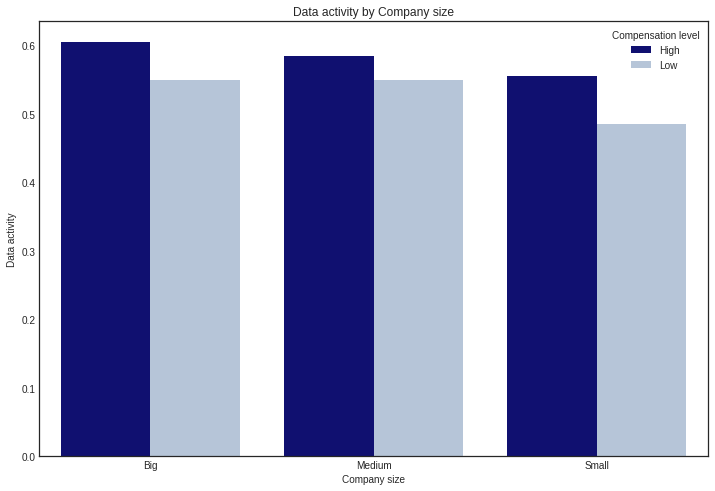

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Activity_ratio,
            x="Company size",
            y="Data activity",
            hue = 'Compensation level',
            palette = ['Navy','lightsteelblue'])
plt.title('Data activity by Company size')
plt.show()

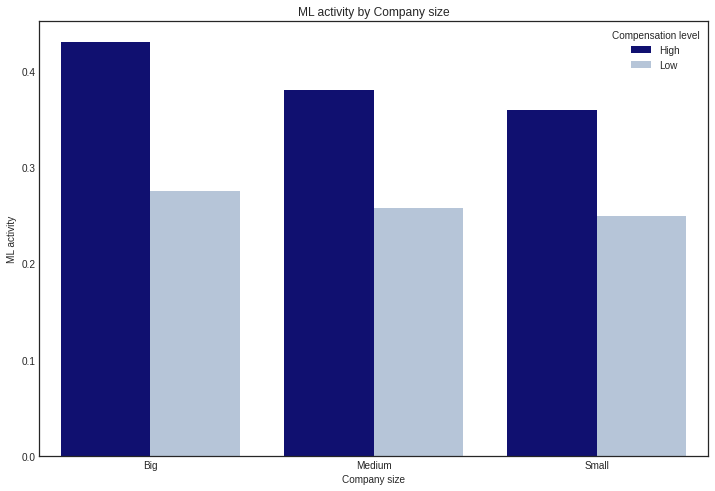

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=Activity_ratio,
            x="Company size",
            y="ML activity",
            hue = 'Compensation level',
            palette = ['Navy','lightsteelblue'])
plt.title('ML activity by Company size')
plt.show()

In [ ]:
ML_company = round(final_df.groupby(['Company size','Does your current employer incorporate machine learning methods into their business?'])['Company size'].count()/final_df.groupby('Company size')['Company size'].count(),2)
ML_company = ML_company.to_frame('Ratio')
ML_company = ML_company.reset_index()
ML_company

,Company size,Does your current employer incorporate machine learning methods into their business?,Ratio
0,Big,I do not know,0.13
1,Big,No (we do not use ML methods),0.09
2,Big,We are exploring ML methods (and may one day p...,0.16
3,Big,"We have well established ML methods (i.e., mod...",0.31
4,Big,"We recently started using ML methods (i.e., mo...",0.16
5,Big,We use ML methods for generating insights (but...,0.15
6,Medium,I do not know,0.12
7,Medium,No (we do not use ML methods),0.11
8,Medium,We are exploring ML methods (and may one day p...,0.20
9,Medium,"We have well established ML methods (i.e., mod...",0.20


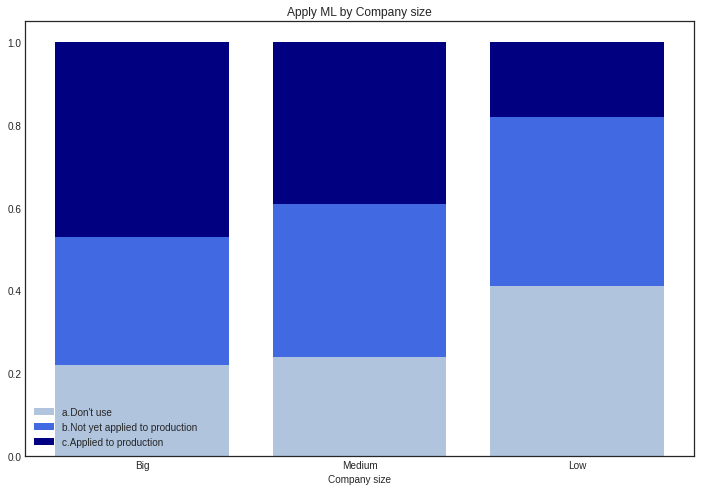

In [ ]:
x = ['Big','Medium','Low']
y1 = np.array([0.22,0.24,0.41])
y2 = np.array([0.31,0.37,0.41])
y3 = np.array([0.47,0.39,0.18])


plt.figure(figsize=(12,8))
plt.bar(x, y1, color='lightsteelblue')
plt.bar(x, y2, bottom=y1, color='royalblue')
plt.bar(x, y3, bottom=y1+y2, color='navy')

plt.xlabel("Company size")
plt.legend(["a.Don't use", "b.Not yet applied to production", "c.Applied to production"],loc='lower left')
plt.title("Apply ML by Company size")
plt.show()

ML applied to production increases with company size

In [ ]:
ML_Ex_tb = round(final_df.groupby(['Company size','ML Experience'])['Age'].count()/final_df[final_df['ML Experience'].notna()].groupby('Company size')['Age'].count(),2)
ML_Ex_tb = ML_Ex_tb.to_frame('Ratio')
ML_Ex_tb = ML_Ex_tb.reset_index()
ML_Ex_tb

,Company size,ML Experience,Ratio
0,Big,a.Not use,0.09
1,Big,b.< 1 years,0.29
2,Big,c.1-2 years,0.30
3,Big,d.2-3 years,0.18
4,Big,e.3-4 years,0.08
5,Big,f.4-5 years,0.04
6,Big,g.5-10 years,0.02
7,Medium,a.Not use,0.09
8,Medium,b.< 1 years,0.42
9,Medium,c.1-2 years,0.27


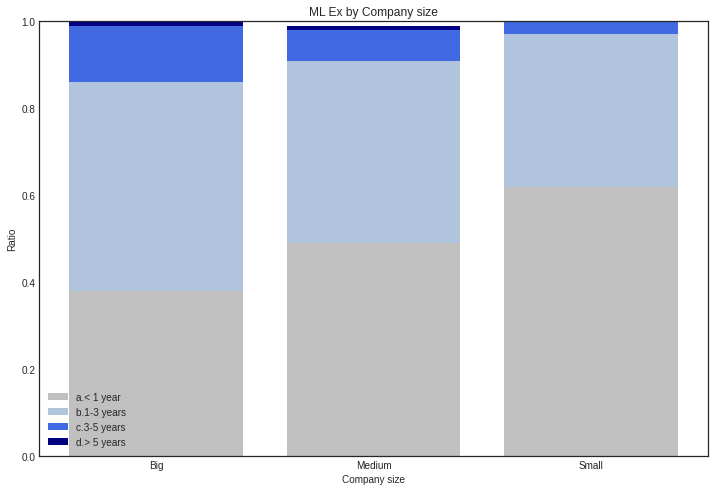

In [ ]:
x = ['Big', 'Medium','Small']
y1 = np.array([0.38,0.49,0.62])
y2 = np.array([0.48,0.42,0.35])
y3 = np.array([0.13,0.07,0.03])
y4 = np.array([0.01,0.01,0.00])


plt.figure(figsize=(12,8))
plt.bar(x, y1, color='silver')
plt.bar(x, y2, bottom=y1, color='lightsteelblue')
plt.bar(x, y3, bottom=y1+y2, color='royalblue')
plt.bar(x, y4, bottom=y1+y2+y3, color='navy')

plt.xlabel("Company size")
plt.ylabel("Ratio")
plt.legend(["a.< 1 year", "b.1-3 years", "c.3-5 years", "d.> 5 years"],loc='lower left')
plt.title("ML Ex by Company size")
plt.show()

###### Recommend Machine learing skill & tool

In [ ]:
def get_table(x,y):
  df = pd.concat([x,y],axis=1)
  df = df.groupby('Company size')[df.columns[2:]].count()
  df['Total'] = df[df.columns[:]].sum(axis = 1)
  a = df['Total'].iloc[0]
  b = df['Total'].iloc[1]
  c = df['Total'].iloc[2]
  df = df.T.reset_index()
  df['Big'] = round(df['Big']/a,2)
  df['Medium'] = round(df['Medium']/b,2)
  df['Small'] = round(df['Small']/c,2)
  df = df.sort_values('Big')
  df = df[:-1]
  return df

In [ ]:
ML_framework = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[61:75]])
ML_framework

Company size,index,Big,Medium,Small
13,ML frameworks - JAX,0.00,0.00,0.00
5,ML frameworks - MXNet,0.01,0.01,0.01
10,ML frameworks - H2O 3,0.01,0.01,0.01
12,ML frameworks - Tidymodels,0.01,0.01,0.01
4,ML frameworks - Fast.ai,0.02,0.02,0.01
9,ML frameworks - Prophet,0.02,0.03,0.01
11,ML frameworks - Caret,0.02,0.02,0.01
8,ML frameworks - CatBoost,0.04,0.03,0.03
7,ML frameworks - LightGBM,0.07,0.05,0.04
3,ML frameworks - PyTorch,0.09,0.11,0.11


<BarContainer object of 14 artists>

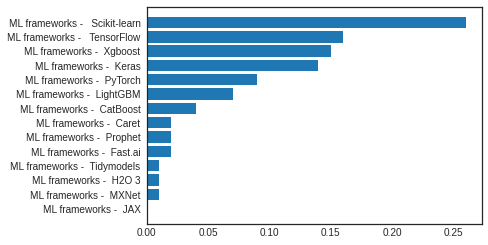

In [ ]:
plt.barh(ML_framework['index'],ML_framework['Big'])

In [ ]:
CV = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[89:94]])
CV

Company size,index,Big,Medium,Small
4,Computer vision methods - Generative Networks ...,0.09,0.10,0.09
0,Computer vision methods - General purpose imag...,0.18,0.17,0.18
1,Computer vision methods - Image segmentation m...,0.21,0.22,0.22
2,Computer vision methods - Object detection met...,0.21,0.21,0.23
3,Computer vision methods - Image classification...,0.31,0.31,0.28


<BarContainer object of 5 artists>

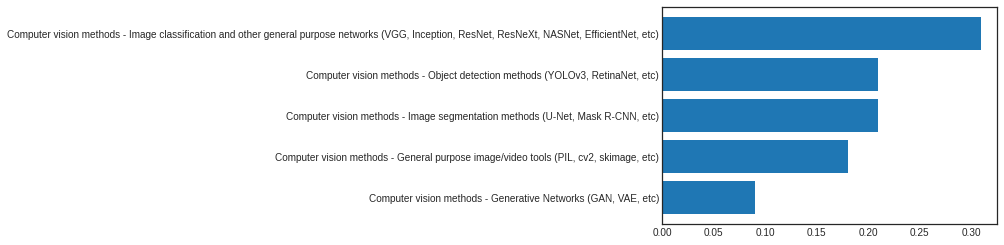

In [ ]:
plt.barh(CV['index'],CV['Big'])

In [ ]:
ML_algorithms = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[77:87]])
ML_algorithms

Company size,index,Big,Medium,Small
4,ML algorithms - Evolutionary Approaches,0.01,0.02,0.01
7,ML algorithms - Generative Adversarial Networks,0.02,0.02,0.02
9,"ML algorithms - Transformer Networks (BERT, gp...",0.04,0.04,0.03
3,ML algorithms - Bayesian Approaches,0.07,0.09,0.09
5,"ML algorithms - Dense Neural Networks (MLPs, etc)",0.07,0.07,0.06
8,ML algorithms - Recurrent Neural Networks,0.07,0.08,0.07
6,ML algorithms - Convolutional Neural Networks,0.10,0.11,0.11
2,ML algorithms - Gradient Boosting Machines (xg...,0.17,0.14,0.12
1,ML algorithms - Decision Trees or Random Forests,0.22,0.20,0.22
0,ML algorithms - Linear or Logistic Regression,0.23,0.23,0.25


<BarContainer object of 10 artists>

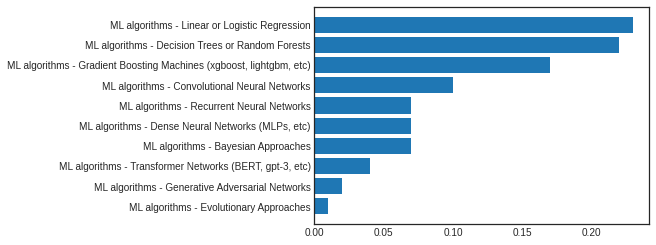

In [ ]:
plt.barh(ML_algorithms['index'],ML_algorithms['Big'])

In [ ]:
NLP_methods = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[96:100]])
NLP_methods

Company size,index,Big,Medium,Small
2,"NLP methods - Contextualized embeddings (ELMo,...",0.13,0.15,0.15
1,NLP methods - Encoder-decorder models (seq2seq...,0.25,0.25,0.27
3,NLP methods - Transformer language models (GPT...,0.27,0.27,0.24
0,"NLP methods - Word embeddings/vectors (GLoVe, ...",0.35,0.33,0.34


<BarContainer object of 4 artists>

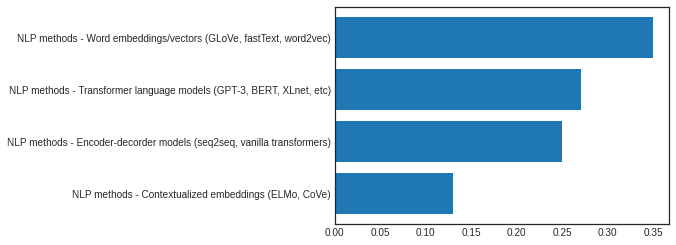

In [ ]:
plt.barh(NLP_methods['index'],NLP_methods['Big'])

In [ ]:
Auto_ML_tools = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[161:166]])
Auto_ML_tools['index'] = Auto_ML_tools['index'].replace(r"Do you use any automated machine learning tools \(or partial AutoML tools\) on a regular basis\?  \(Select all that apply\) - Selected Choice", "Auto ML tools", regex=True)
Auto_ML_tools

Company size,index,Big,Medium,Small
3,Auto ML tools - Automated model architecture s...,0.08,0.09,0.13
1,Auto ML tools - Automated feature engineering/...,0.17,0.18,0.21
4,Auto ML tools - Automated hyperparameter tunin...,0.17,0.16,0.12
0,Auto ML tools - Automated data augmentation (e...,0.18,0.23,0.24
2,Auto ML tools - Automated model selection (e.g...,0.40,0.34,0.30


<BarContainer object of 5 artists>

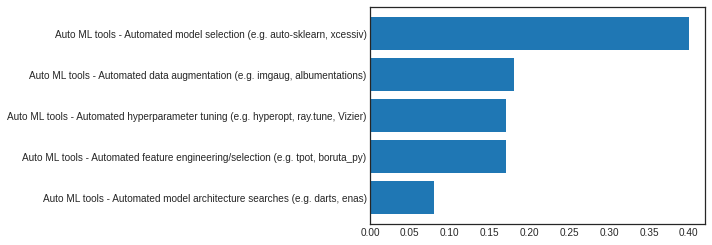

In [ ]:
plt.barh(Auto_ML_tools['index'],Auto_ML_tools['Big'])

In [ ]:
Manage_ML = get_table(final_df[final_df.columns[-2:]],final_df[final_df.columns[173:181]])
Manage_ML['index'] = Manage_ML['index'].replace(r"Do you use any tools to help manage machine learning experiments\? \(Select all that apply\) - Selected Choice", "Manage ML", regex=True)
Manage_ML

Company size,index,Big,Medium,Small
2,Manage ML - Comet.ml,0.01,0.06,0.05
7,Manage ML - Domino Model Monitor,0.02,0.03,0.08
3,Manage ML - Sacred + Omniboard,0.03,0.04,0.05
6,Manage ML - Polyaxon,0.05,0.04,0.07
5,Manage ML - Guild.ai,0.09,0.04,0.07
0,Manage ML - Neptune.ai,0.10,0.08,0.09
1,Manage ML - Weights & Biases,0.19,0.19,0.16
4,Manage ML - TensorBoard,0.50,0.53,0.44


<BarContainer object of 8 artists>

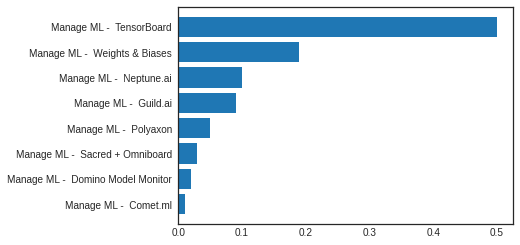

In [ ]:
plt.barh(Manage_ML['index'],Manage_ML['Big'])

In [ ]:
Overall = df[df.columns[:7]]
Overall = Overall[Overall['Country'].isin(['China','India'])]

In [ ]:
Overall

,Duration (in seconds),Age,Gender,Country,Degree,Job,Experience
5,401,32.0,Man,India,Bachelor’s degree,DA,b.< 1 years
7,171196,27.0,Woman,China,Master’s degree,Student,b.< 1 years
9,150,23.0,Man,China,No formal education past high school,Student,b.< 1 years
10,7469,19.5,Man,India,Bachelor’s degree,Student,c.1-3 years
15,413,19.5,Woman,India,Bachelor’s degree,Student,c.1-3 years
...,...,...,...,...,...,...,...
45998,371,19.5,Man,India,Bachelor’s degree,Software Engineer,c.1-3 years
46001,40250,19.5,Man,India,Master’s degree,DA,c.1-3 years
46002,323,32.0,Man,India,Bachelor’s degree,DA,c.1-3 years
46005,253,23.0,Man,China,Master’s degree,Student,c.1-3 years


In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries -- Đi học syntax 
import gspread
from google.auth import default
creds, _ = default()
from gspread_dataframe import set_with_dataframe

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('ML project1')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):

    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','Activity_tb',Activity_tb)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','Activity_ratio', Activity_ratio)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','ML_company', ML_company)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','ML_Ex_tb', ML_Ex_tb)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','ML_framework', ML_framework)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','CV', CV)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','ML_algorithms', ML_algorithms)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','NLP_methods', NLP_methods)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','Auto_ML_tools', Auto_ML_tools)
export_data_to_new_sheet('1FZGhzonK7A3fYtPJD6i76kvSjHGfNYt-Hp3xtiauXIs','Manage_ML', Manage_ML)